# Programming Excercise: MMA marketing dataset

PLEASE NOTE THAT THE CELL BELOW CONTAINS THE R FILE USED FOR THE EDA. THE REST OF THIS DOCUMENT CONTAINS THE CODE FOR THE MODELLING WHICH WAS CONDUCTED ON PYTHON. 
Due to not being able to upload 3 documents onto the vle, the two codes files had to be combined into this one code file.

Import relevant libaries

In [163]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plpt
import seaborn as sns
import numpy as np

Import MMA marketing dataset

In [229]:
MMA = pd.read_csv('C:/Users/nimas/Programming excercise/MMA_Marketing_data_sample.csv')

View dataset

In [230]:
MMA

,age,job,marital,k,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,36,admin.,single,university.degree,no,no,yes,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4096,33,services,married,high.school,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4097,41,blue-collar,divorced,basic.9y,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4098,34,housemaid,single,university.degree,no,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [231]:
#calculating correlation matrix for MMA dataset
corr_matrix=MMA.corr()
print(corr_matrix)
    

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.038178 -0.013631 -0.043454  0.051975   
duration        0.038178  1.000000 -0.084542 -0.047194  0.026444   
campaign       -0.013631 -0.084542  1.000000  0.058967 -0.091562   
pdays          -0.043454 -0.047194  0.058967  1.000000 -0.588319   
previous        0.051975  0.026444 -0.091562 -0.588319  1.000000   
emp.var.rate   -0.019036 -0.026404  0.176226  0.271350 -0.415502   
cons.price.idx  0.000248  0.019599  0.145684  0.058735 -0.165460   
cons.conf.idx   0.095539 -0.038541  0.007921 -0.092308 -0.051153   
euribor3m      -0.015143 -0.030625  0.159746  0.302191 -0.458930   
nr.employed    -0.041770 -0.042313  0.161126  0.382896 -0.514959   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019036        0.000248       0.095539  -0.015143   
duration           -0.026404        0.019599      -0.038541  -0.030625   
campaign            0.176226 

C:\Users\nimas\AppData\Local\Temp\ipykernel_6356\1236978382.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=MMA.corr()


In [232]:
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.038178,-0.013631,-0.043454,0.051975,-0.019036,0.000248,0.095539,-0.015143,-0.041770
duration,0.038178,1.000000,-0.084542,-0.047194,0.026444,-0.026404,0.019599,-0.038541,-0.030625,-0.042313
campaign,-0.013631,-0.084542,1.000000,0.058967,-0.091562,0.176226,0.145684,0.007921,0.159746,0.161126
pdays,-0.043454,-0.047194,0.058967,1.000000,-0.588319,0.271350,0.058735,-0.092308,0.302191,0.382896
previous,0.051975,0.026444,-0.091562,-0.588319,1.000000,-0.415502,-0.165460,-0.051153,-0.458930,-0.514959
emp.var.rate,-0.019036,-0.026404,0.176226,0.271350,-0.415502,1.000000,0.755238,0.195653,0.970312,0.897050
cons.price.idx,0.000248,0.019599,0.145684,0.058735,-0.165460,0.755238,1.000000,0.046135,0.657293,0.472523
cons.conf.idx,0.095539,-0.038541,0.007921,-0.092308,-0.051153,0.195653,0.046135,1.000000,0.277164,0.107793
euribor3m,-0.015143,-0.030625,0.159746,0.302191,-0.458930,0.970312,0.657293,0.277164,1.000000,0.942526
nr.employed,-0.041770,-0.042313,0.161126,0.382896,-0.514959,0.897050,0.472523,0.107793,0.942526,1.000000


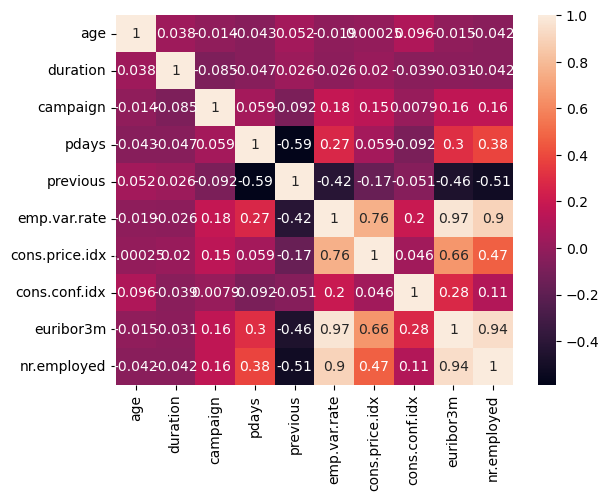

In [233]:
#creating heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True)
plpt.show()

In [328]:
#replacing columns and renaming values:
MMA_2 = MMA.rename(columns={'k': 'education', 'y': 'outcome'} )
MMA_2.loc[:,'job'].replace(['admin.'],
                        ['admin'], inplace=True)


In [329]:
MMA_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,36,admin,single,university.degree,no,no,yes,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4096,33,services,married,high.school,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4097,41,blue-collar,divorced,basic.9y,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4098,34,housemaid,single,university.degree,no,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [236]:
MMA_2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
outcome           0
dtype: int64

In [330]:
#Replacing categorical values with numeric values.


#Job:
MMA_2.loc[:,'job'].replace(['unknown','admin','blue-collar','entrepreneur','housemaid','management',
                    'retired','self-employed','services','student','technician',
                    'unemployed'],
                        [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
#Marital:
MMA_2.loc[:,'marital'].replace(['unknown','divorced','married','single'],
                        [0,1,2,3], inplace=True)
#Education:
MMA_2.loc[:,'education'].replace(['unknown','basic.4y','basic.6y','basic.9y','high.school', 'illiterate',
                          'professional.course','university.degree'],
                        [0,1,2,3,4,5,6,7], inplace=True)
#Default:
MMA_2.loc[:,'default'].replace(['unknown','no','yes'],
                        [0,1,2], inplace=True)

#Housing:
MMA_2.loc[:,'housing'].replace(['unknown','no','yes'],
                        [0,1,2], inplace=True)
#Loan:
MMA_2.loc[:,'loan'].replace(['unknown','no','yes'],
                        [0,1,2], inplace=True)

#Contact:
MMA_2.loc[:,'contact'].replace([ 'cellular','telephone'],
                        [1,2], inplace=True)

#Month
MMA_2.loc[:,'month'].replace(['jan','feb','mar', 'apr','may','jun', 'jul','aug','sep','oct','nov','dec'],
                        [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
#Day of week

MMA_2.loc[:,'day_of_week'].replace(['mon','tue','wed','thu','fri'],
                        [1,2,3,4,5], inplace=True)
#poutcome:

MMA_2.loc[:,'poutcome'].replace(['failure','nonexistent','success'],
                        [1,0,2], inplace=True)
#outcome:

MMA_2.loc[:,'outcome'].replace(['no', 'yes'],
                        [0,1], inplace=True)


In [331]:
MMA_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,30,2,2,3,1,2,1,1,5,5,...,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,8,3,4,1,1,1,2,5,5,...,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,8,2,4,1,2,1,2,6,3,...,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,8,2,3,1,0,0,2,6,5,...,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,2,7,1,2,1,1,11,1,...,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,36,1,3,7,1,1,2,1,8,5,...,2,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0
4096,33,8,2,4,1,1,1,2,5,1,...,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4097,41,2,1,3,1,1,1,1,8,2,...,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0
4098,34,4,3,7,1,2,1,1,8,4,...,3,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0


In [332]:
#Creating updated correlation matrix
corr_matrix_2=MMA_2.corr()
print(corr_matrix_2)

                     age       job   marital  education   default   housing  \
age             1.000000 -0.005724 -0.394932  -0.157606 -0.162603 -0.000611   
job            -0.005724  1.000000  0.009967   0.133016  0.064537 -0.013045   
marital        -0.394932  0.009967  1.000000   0.086100  0.076729  0.002071   
education      -0.157606  0.133016  0.086100   1.000000  0.225375  0.047694   
default        -0.162603  0.064537  0.076729   0.225375  1.000000  0.013399   
housing        -0.000611 -0.013045  0.002071   0.047694  0.013399  1.000000   
loan           -0.000134 -0.023346 -0.005816   0.011340 -0.000591  0.252210   
contact         0.012293 -0.018459 -0.067250  -0.128249 -0.149803 -0.072497   
month           0.049207  0.029271  0.000207   0.122196  0.111627  0.034172   
day_of_week    -0.029758  0.000333  0.027531   0.015544  0.013385 -0.004453   
duration        0.038178 -0.013657 -0.010076  -0.006239  0.018129 -0.006322   
campaign       -0.013631  0.006436  0.002836   0.013

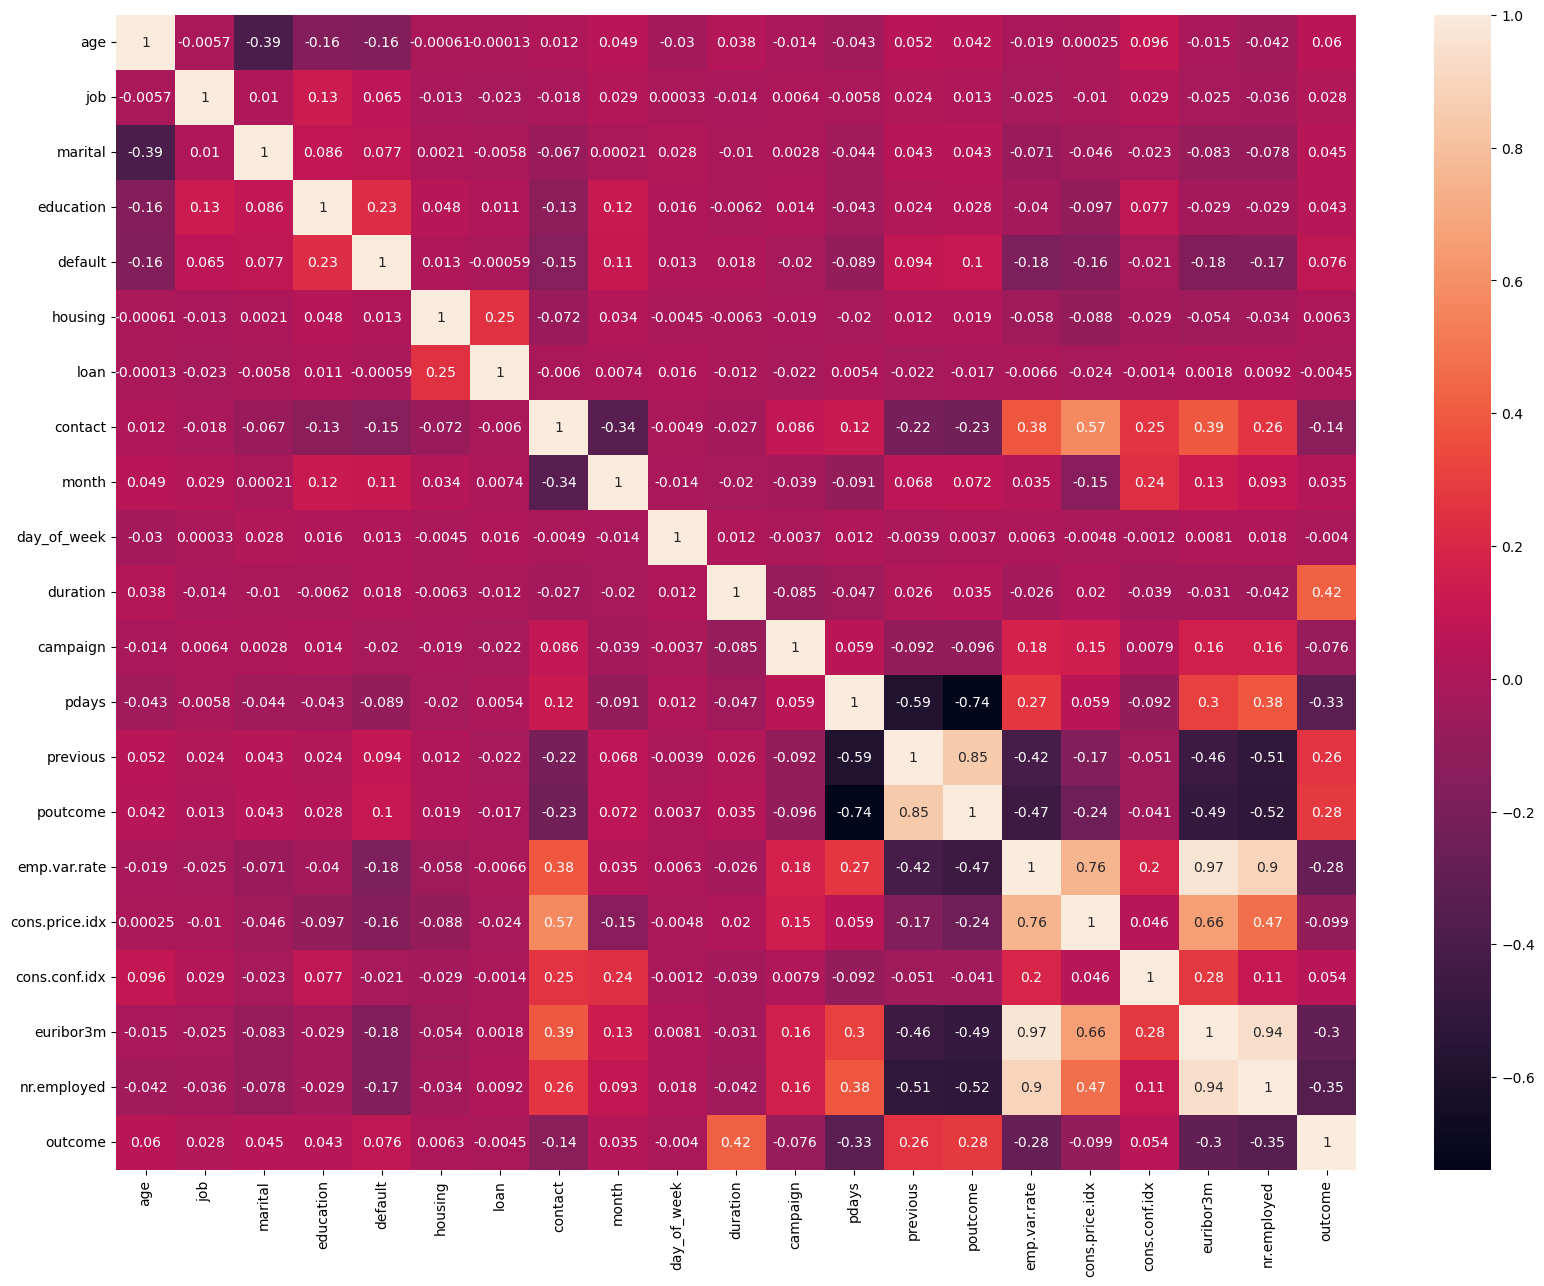

In [240]:
#creating heatmap with updated correlation matrix
plpt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix_2, annot=True)
plpt.show()

# Creating simple logistic regression model

Import required modules

In [241]:
import numpy as np
import matplotlib.pyplot as plpt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
%matplotlib inline

In [242]:
# we will be using the MMA_2 dataset

In [243]:
#explore dataset
MMA_2.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,40.117073,4.713415,2.166585,4.455610,0.805366,1.502439,1.136098,1.356341,6.692439,2.960732,...,2.538537,960.243415,0.190732,0.179512,0.085171,93.580123,-40.498463,3.621421,5166.472780,0.110000
std,10.315182,3.567844,0.608796,2.242492,0.396583,0.548452,0.410302,0.478976,2.064179,1.409261,...,2.568833,192.349065,0.542609,0.465412,1.563183,0.579578,4.593385,1.733708,73.664618,0.312928
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,3.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,6.000000,3.000000,...,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,8.000000,3.000000,7.000000,1.000000,2.000000,1.000000,2.000000,8.000000,4.000000,...,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,12.000000,5.000000,...,35.000000,999.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [244]:
#Defining dependent and independent variables 

X = MMA_2.drop(columns = "outcome") 
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,2,2,3,1,2,1,1,5,5,487,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,8,3,4,1,1,1,2,5,5,346,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0
2,25,8,2,4,1,2,1,2,6,3,227,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1
3,38,8,2,3,1,0,0,2,6,5,17,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1
4,47,1,2,7,1,2,1,1,11,1,58,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,36,1,3,7,1,1,2,1,8,5,69,2,999,0,0,1.4,93.444,-36.1,4.963,5228.1
4096,33,8,2,4,1,1,1,2,5,1,146,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4097,41,2,1,3,1,1,1,1,8,2,102,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1
4098,34,4,3,7,1,2,1,1,8,4,159,3,999,0,0,1.4,93.444,-36.1,4.963,5228.1


In [245]:
#Defining dependent and independent variables 
y = MMA_2["outcome"]
y

0       0
1       0
2       0
3       0
4       0
       ..
4095    0
4096    0
4097    0
4098    0
4099    0
Name: outcome, Length: 4100, dtype: int64

In [296]:
# Split data set. Portion to train model and the rest to test model using sklearn.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 21)

In [297]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1604,25,9,3,4,1,1,1,2,11,2,345,2,999,0,0,-3.4,92.649,-30.1,0.715,5017.5
2195,31,1,3,7,1,1,2,1,8,4,167,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1
3079,48,3,2,7,1,2,1,1,4,4,126,3,999,0,0,-1.8,93.075,-47.1,1.365,5099.1
1247,50,7,2,6,1,1,1,1,7,4,73,7,999,0,0,1.4,93.918,-42.7,4.968,5228.1
1497,34,10,2,6,1,2,1,1,3,1,93,1,999,0,0,-1.8,92.843,-50.0,1.629,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,38,2,2,3,1,1,1,2,6,3,333,1,999,0,0,1.4,94.465,-41.8,4.958,5228.1
840,58,1,2,7,1,1,1,1,8,3,233,2,999,0,0,1.4,93.444,-36.1,4.965,5228.1
1144,59,1,2,4,1,1,1,2,6,1,204,4,999,0,0,1.4,94.465,-41.8,4.960,5228.1
48,44,8,2,6,1,1,1,1,8,1,341,2,999,0,0,1.4,93.444,-36.1,4.970,5228.1


In [298]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3533,26,2,3,4,1,1,1,2,5,5,213,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0
292,26,10,3,7,1,2,1,1,7,5,806,3,6,2,2,-1.7,94.215,-40.3,0.861,4991.6
2850,30,9,3,6,1,1,1,1,9,1,162,2,9,2,1,-1.1,94.199,-37.5,0.879,4963.6
1235,37,2,2,2,1,0,0,1,10,5,93,1,999,0,0,-3.4,92.431,-26.9,0.730,5017.5
3180,41,10,3,7,1,2,2,1,7,3,184,1,999,0,0,1.4,93.918,-42.7,4.962,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,37,1,3,7,1,1,1,1,8,5,89,2,999,0,0,1.4,93.444,-36.1,4.966,5228.1
1089,48,1,1,4,1,1,1,2,7,1,352,2,999,0,0,1.4,93.918,-42.7,4.960,5228.1
968,51,2,2,3,1,1,2,2,5,5,653,1,999,0,0,1.1,93.994,-36.4,4.855,5191.0
3592,43,2,2,2,1,1,1,1,7,3,272,1,999,0,0,1.4,93.918,-42.7,4.962,5228.1


In [249]:
#All data needs to be in same range as its better for the training of the model.
#Therefore a scaler will be used.
from sklearn.preprocessing import StandardScaler

In [299]:
#define scaler
scaler = StandardScaler()

In [300]:
#Scaling X_train data
X_train_scaled = scaler.fit_transform(X_train)

In [301]:
#Scaling X_test data
X_test_scaled = scaler.transform(X_test)

In [302]:
# View X_train scaled data
X_train_scaled

array([[-1.46208233,  1.21446966,  1.38301347, ...,  2.23803053,
        -1.65033078, -1.99982091],
       [-0.88609327, -1.04500878,  1.38301347, ...,  0.94723963,
         0.78592495,  0.85205992],
       [ 0.74587573, -0.48013917, -0.26124861, ..., -1.41921035,
        -1.27755154, -0.89481865],
       ...,
       [ 1.80185567, -1.04500878, -0.26124861, ..., -0.27901172,
         0.78420443,  0.85205992],
       [ 0.36188302,  0.93203486, -0.26124861, ...,  0.94723963,
         0.7899395 ,  0.85205992],
       [-0.50210057, -0.76257397, -0.26124861, ...,  1.61414826,
        -1.65491883, -1.91857074]])

In [303]:
#View X_test scaled data
X_test_scaled

array([[-1.36608415, -0.76257397,  1.38301347, ...,  0.88270009,
         0.72398625,  0.34966306],
       [-1.36608415,  1.49690447,  1.38301347, ...,  0.043686  ,
        -1.56659883, -2.35055079],
       [-0.98209145,  1.21446966,  1.38301347, ...,  0.64605509,
        -1.55627571, -2.72971823],
       ...,
       [ 1.03387025, -0.76257397, -0.26124861, ...,  0.88270009,
         0.72398625,  0.34966306],
       [ 0.26588484, -0.76257397, -0.26124861, ..., -0.47263036,
         0.78535145,  0.85205992],
       [-1.07808962, -1.04500878,  1.38301347, ...,  1.22691099,
        -1.69391728, -2.11898782]])

In [304]:
#Train logistic regression model with X_training data
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [305]:
#Check to see if it can predict y_train values.
log_reg.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [306]:
log_reg.score(X_train_scaled, y_train)

0.9118466898954704

In [307]:
log_reg.score(X_test_scaled, y_test)

0.9252032520325203

In [310]:
class_weight= "balanced"

In [311]:
log_reg

LogisticRegression(C=1, random_state=0)

In [317]:
#Creating logisistic regression model 1: No improvement
log_reg= LogisticRegression(random_state = 0,
                            C = 1, 
                            fit_intercept = True,).fit(X_train_scaled, y_train)

In [318]:
# Checking Model 1, train dataset score. 
log_reg.score(X_train_scaled, y_train)

0.9118466898954704

In [319]:
# Checking Model 1, test dataset score. 
log_reg.score(X_test_scaled, y_test)

0.9252032520325203

In [320]:
#Creating Logistic regression model1: Class weight balanced
log_reg1= LogisticRegression(random_state = 0,
                            C = 1, class_weight= "balanced",
                            fit_intercept = True,).fit(X_train_scaled, y_train)

In [321]:
# Check how well this improved model performance.
# Nothing changed.
log_reg1.score(X_train_scaled, y_train)

0.8536585365853658

In [322]:
# Check how well this improved model performance on test data.
# Nothing changed
log_reg1.score(X_test_scaled, y_test)

0.8634146341463415

In [323]:
#View X_train shape
print(X_train_scaled.shape)

(2870, 20)


In [264]:
#View y_train shape
print(y_train.shape)

(2870,)


In [265]:
#View X_test shape
print(X_test_scaled.shape)

(1230, 20)


In [266]:
#View y_test shape
print(y_test.shape)

(1230,)


In [267]:
#import stat model
import statsmodels.api as sm

In [324]:
#Predict outcome of testing data using improved model 1:

y_pred=log_reg1.predict(X_test_scaled)

In [325]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

# ROC Curve

In [269]:
#import

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [270]:
#defining ROC function
log_ROC_auc=roc_auc_score(y_test,log_reg1.predict(X_test_scaled))
fpr,tpr,threshold=roc_curve(y_test,log_reg1.predict_proba(X_test_scaled)[:,1])

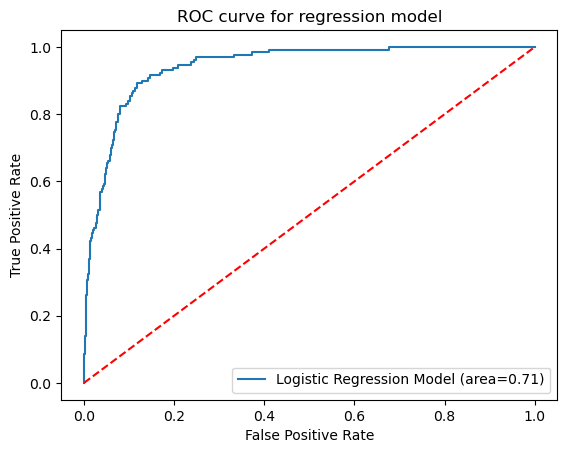

In [326]:
#Plot the ROC curve with improved model 1
plpt.figure()
plpt.plot(fpr,tpr,label="Logistic Regression Model (area=%0.2f)" % log_ROC_auc)
plpt.xlabel('False Positive Rate')
plpt.ylabel('True Positive Rate')
plpt.title("ROC curve for regression model")
plpt.plot([0,1], [0,1],'r--')
plpt.xlim([-0.05, 1.05])
plpt.ylim([-0.05, 1.05])
plpt.legend(loc="lower right")
plpt.show()

In [333]:
#Improving ROC model discrimination by removing irrelevant variables. 
X2 = MMA_2.drop(["emp.var.rate", "poutcome", "default", "nr.employed", "day_of_week"], axis=1, inplace = True) 
X2 = MMA_2

In [334]:
MMA_2

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,outcome
0,30,2,2,3,2,1,1,5,487,2,999,0,92.893,-46.2,1.313,0
1,39,8,3,4,1,1,2,5,346,4,999,0,93.994,-36.4,4.855,0
2,25,8,2,4,2,1,2,6,227,1,999,0,94.465,-41.8,4.962,0
3,38,8,2,3,0,0,2,6,17,3,999,0,94.465,-41.8,4.959,0
4,47,1,2,7,2,1,1,11,58,1,999,0,93.200,-42.0,4.191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,36,1,3,7,1,2,1,8,69,2,999,0,93.444,-36.1,4.963,0
4096,33,8,2,4,1,1,2,5,146,2,999,0,93.994,-36.4,4.857,0
4097,41,2,1,3,1,1,1,8,102,1,999,0,93.444,-36.1,4.963,0
4098,34,4,3,7,2,1,1,8,159,3,999,0,93.444,-36.1,4.963,0


In [274]:
X2

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,outcome
0,30,2,2,3,2,1,1,5,487,2,999,0,92.893,-46.2,1.313,0
1,39,8,3,4,1,1,2,5,346,4,999,0,93.994,-36.4,4.855,0
2,25,8,2,4,2,1,2,6,227,1,999,0,94.465,-41.8,4.962,0
3,38,8,2,3,0,0,2,6,17,3,999,0,94.465,-41.8,4.959,0
4,47,1,2,7,2,1,1,11,58,1,999,0,93.200,-42.0,4.191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,36,1,3,7,1,2,1,8,69,2,999,0,93.444,-36.1,4.963,0
4096,33,8,2,4,1,1,2,5,146,2,999,0,93.994,-36.4,4.857,0
4097,41,2,1,3,1,1,1,8,102,1,999,0,93.444,-36.1,4.963,0
4098,34,4,3,7,2,1,1,8,159,3,999,0,93.444,-36.1,4.963,0


In [335]:
# Split data set 2. Portion to train model and the rest to test model using sklearn.
X2_train, X2_test, y_train, y_test = train_test_split(X2,y, test_size=0.3, random_state = 21)

In [336]:
X2_train

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,outcome
1604,25,9,3,4,1,1,2,11,345,2,999,0,92.649,-30.1,0.715,0
2195,31,1,3,7,1,2,1,8,167,1,999,0,93.444,-36.1,4.963,0
3079,48,3,2,7,2,1,1,4,126,3,999,0,93.075,-47.1,1.365,0
1247,50,7,2,6,1,1,1,7,73,7,999,0,93.918,-42.7,4.968,0
1497,34,10,2,6,2,1,1,3,93,1,999,0,92.843,-50.0,1.629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,38,2,2,3,1,1,2,6,333,1,999,0,94.465,-41.8,4.958,0
840,58,1,2,7,1,1,1,8,233,2,999,0,93.444,-36.1,4.965,0
1144,59,1,2,4,1,1,2,6,204,4,999,0,94.465,-41.8,4.960,0
48,44,8,2,6,1,1,1,8,341,2,999,0,93.444,-36.1,4.970,0


In [337]:
X2_test

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,outcome
3533,26,2,3,4,1,1,2,5,213,4,999,0,93.994,-36.4,4.855,0
292,26,10,3,7,2,1,1,7,806,3,6,2,94.215,-40.3,0.861,1
2850,30,9,3,6,1,1,1,9,162,2,9,2,94.199,-37.5,0.879,0
1235,37,2,2,2,0,0,1,10,93,1,999,0,92.431,-26.9,0.730,0
3180,41,10,3,7,2,2,1,7,184,1,999,0,93.918,-42.7,4.962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,37,1,3,7,1,1,1,8,89,2,999,0,93.444,-36.1,4.966,0
1089,48,1,1,4,1,1,2,7,352,2,999,0,93.918,-42.7,4.960,0
968,51,2,2,3,1,2,2,5,653,1,999,0,93.994,-36.4,4.855,1
3592,43,2,2,2,1,1,1,7,272,1,999,0,93.918,-42.7,4.962,0


In [338]:
#Scaling X2 train and test:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

In [339]:
X2_test_scaled

array([[-1.37638161, -0.7563474 ,  1.33764132, ...,  0.91639593,
         0.68301868, -0.34377583],
       [-1.37638161,  1.44817228,  1.33764132, ...,  0.04208433,
        -1.6558533 ,  2.90887237],
       [-0.97895233,  1.17260732,  1.33764132, ...,  0.66979523,
        -1.64531257, -0.34377583],
       ...,
       [ 1.1075514 , -0.7563474 , -0.30273637, ...,  0.91639593,
         0.68301868,  2.90887237],
       [ 0.31269283, -0.7563474 , -0.30273637, ..., -0.49595357,
         0.74567749, -0.34377583],
       [-1.07830965, -1.03191237,  1.33764132, ...,  1.27508787,
        -1.7858557 ,  2.90887237]])

In [340]:
X2_train_scaled

array([[-1.46208233,  1.21446966,  1.38301347, ...,  2.23803053,
        -1.65033078, -0.35486862],
       [-0.88609327, -1.04500878,  1.38301347, ...,  0.94723963,
         0.78592495, -0.35486862],
       [ 0.74587573, -0.48013917, -0.26124861, ..., -1.41921035,
        -1.27755154, -0.35486862],
       ...,
       [ 1.80185567, -1.04500878, -0.26124861, ..., -0.27901172,
         0.78420443, -0.35486862],
       [ 0.36188302,  0.93203486, -0.26124861, ...,  0.94723963,
         0.7899395 , -0.35486862],
       [-0.50210057, -0.76257397, -0.26124861, ...,  1.61414826,
        -1.65491883, -0.35486862]])

In [341]:
#Creating logistic regression model 2
log_reg2= LogisticRegression(random_state = 0,
                            C = 1, class_weight= "balanced",
                            fit_intercept = True,).fit(X2_train_scaled, y_train)

In [342]:
#Check accuracy score of the Logistic regression model 2. 

log_reg2.score(X2_train_scaled, y_train)

1.0

In [343]:
#Check accuracy score of the Logistic regression model 2.
log_reg2.score(X2_test_scaled, y_test)

1.0

In [344]:
#Predict outcome Model 2
y_pred2=log_reg2.predict(X2_test_scaled)
print(y_pred2)

[0 1 0 ... 1 0 1]


In [345]:
#Defining ROC function
log_ROC_auc2=roc_auc_score(y_test,log_reg2.predict(X2_test_scaled))
fpr2,tpr2,threshold2=roc_curve(y_test,log_reg2.predict_proba(X2_test_scaled)[:,1])

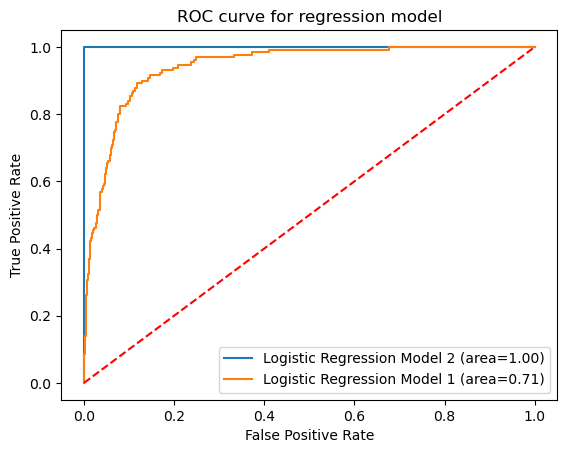

In [346]:
#Plot the ROC curve 2
plpt.figure()
plpt.plot(fpr2,tpr2,label="Logistic Regression Model 2 (area=%0.2f)" % log_ROC_auc2)
plpt.plot(fpr,tpr,label="Logistic Regression Model 1 (area=%0.2f)" % log_ROC_auc)
plpt.xlabel('False Positive Rate')
plpt.ylabel('True Positive Rate')
plpt.title("ROC curve for regression model")
plpt.plot([0,1], [0,1],'r--')
plpt.xlim([-0.05, 1.05])
plpt.ylim([-0.05, 1.05])
plpt.legend(loc="lower right")
plpt.show()

In [347]:
from sklearn.metrics import classification_report, confusion_matrix

In [348]:
#Classification report Model 1 - no improvements:
print(classification_report(y_test, log_reg.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1100
           1       0.74      0.45      0.56       130

    accuracy                           0.93      1230
   macro avg       0.84      0.71      0.76      1230
weighted avg       0.92      0.93      0.92      1230



In [349]:
#Classification report Model 2: improvements.
print(classification_report(y_test, log_reg2.predict(X2_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1100
           1       1.00      1.00      1.00       130

    accuracy                           1.00      1230
   macro avg       1.00      1.00      1.00      1230
weighted avg       1.00      1.00      1.00      1230



In [350]:
#Classification report Model 1: improvements.
print(classification_report(y_test, log_reg1.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1100
           1       0.43      0.92      0.59       130

    accuracy                           0.86      1230
   macro avg       0.71      0.89      0.75      1230
weighted avg       0.93      0.86      0.88      1230

